In [129]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import itertools
from collections import Counter
from infomap import Infomap
from operator import itemgetter

In [117]:
data = pd.read_csv('./connections.txt',delimiter=' ',names = ['from','to'])
data.head()

,from,to
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


### 1.Create a Directed graph

In [118]:
directed_graph = nx.DiGraph()
directed_graph.add_edges_from(data.to_numpy())

### 2.Show which nodes are bridges

In [119]:
bridge_edges =list(nx.bridges(directed_graph.to_undirected()))
merged = list(itertools.chain(*bridge_edges))
bridge_nodes = set(merged)
print(bridge_nodes)

{0, 2569, 11, 12, 15, 18, 1560, 2079, 2596, 37, 550, 43, 1581, 3650, 1096, 585, 74, 602, 1119, 607, 608, 613, 107, 3183, 624, 114, 1145, 3709, 638, 3729, 2195, 1684, 668, 3230, 674, 3748, 686, 692, 1206, 698, 209, 210, 3798, 215, 2269, 3820, 3853, 3856, 2842, 287, 801, 292, 1834, 335, 348, 3935, 358, 1386, 875, 3437, 883, 1912, 3451, 891, 3453, 892, 3974, 3980, 911, 3984, 918, 2457, 414, 2470, 4008, 4010, 4015, 4022, 4024, 1466, 447, 4035, 3031, 3570, 3071}


### 3.Show the density of the graph. Comment about your findings 

In [120]:
nx.density(directed_graph)

0.0054099817517196435

##### the density is pretty small, which means that there are a lot of nodes in the data, but only a few are connected to each other.


### 4.Show which nodes have the highest and lowest number of connections.

In [121]:
edges = dict(directed_graph.degree())
highest_connections = sorted(edges, key = edges.get, reverse = True)[:5]
lowest_connections = sorted(edges, key = edges.get, reverse = False)[:5]
print("Keys for nodes with highest conections", highest_connections)
print("Keys for nodes with lowest conections", lowest_connections)

Keys for nodes with highest conections [107, 1684, 1912, 3437, 0]
Keys for nodes with lowest conections [11, 12, 15, 18, 37]


### 5.Show which nodes have the highest incoming and outgoing connections

In [122]:
highest_incoming_connections = dict(directed_graph.in_degree())
highest_outgoing_connections = dict(directed_graph.out_degree())

top_5_in = sorted(highest_incoming_connections, key = highest_incoming_connections.get, reverse = True)[:5]
top_5_out = sorted(highest_outgoing_connections, key = highest_outgoing_connections.get, reverse = True)[:5]
print("Keys for nodes with highest incoming connections ", top_5_in)
print("Keys for nodes with highest outgoing connections ", top_5_out)

Keys for nodes with highest incoming connections  [1888, 2543, 1800, 2611, 1827]
Keys for nodes with highest outgoing connections  [107, 1684, 1912, 3437, 0]


### 6.Show which nodes have the highest closeness, betweenness, and eigenvector. Interpret your findings. 

In [123]:
betweenness = nx.centrality.betweenness_centrality(directed_graph)
highest_betweenness_node = max(directed_graph.nodes, key=betweenness.get)
b=betweenness[highest_betweenness_node]
print("Highest Betweenness Node: {} {}Betweenness: {}".format(highest_betweenness_node,'\n',b ,'\n'))

closeness = nx.centrality.closeness_centrality(directed_graph)
highest_closeness_node = max(directed_graph.nodes, key=closeness.get)
c=closeness[highest_closeness_node]
print("Highest Closeness Node: {} {}Closeness: {}".format(highest_closeness_node,'\n',c,'\n'))


eigenvector = nx.centrality.eigenvector_centrality(directed_graph, max_iter = 800)
highest_eigenvector_node = max(directed_graph.nodes, key=eigenvector.get)
e=eigenvector[highest_eigenvector_node]
print("Highest Eigan Vector Node: {} {}Eigan Vector: {}".format(highest_eigenvector_node, '\n', e))

Highest Betweenness Node: 1684 
Betweenness: 0.03299985344063623
Highest Closeness Node: 2642 
Closeness: 0.11797503012816456
Highest Eigan Vector Node: 2655 
Eigan Vector: 0.802704299670652


### 7.Implement a community detection algorithm on the directed graph and show how many communities were created.

In [124]:
def findCommunities(graph):
    im = Infomap("--two-level --directed")
    print("Building Infomap network from a NetworkX graph...")
    for e in graph.edges():
        im.addLink(*e)
    print("Find communities with Infomap...")
    im.run();
    print("Found {0} communities with codelength: {1}".format(im.num_top_modules,
    im.codelength))
    communities = {}
    for node in im.tree:
        communities[node.node_id] = node.module_id
    nx.set_node_attributes(graph, communities,'community')
    return im.num_top_modules, communities
v=findCommunities(directed_graph)
print("Found", v[0], "communities")

Building Infomap network from a NetworkX graph...
Find communities with Infomap...
Found 96 communities with codelength: 6.58817364825253
Found 96 communities


### 8.Show the largest and the smallest community. | Interpret your findings


In [127]:
c = Counter(v[1].values())

highest_community = sorted(c, key = c.get, reverse = True)[:1]
lowest_community = sorted(c, key = c.get, reverse = False)[:1]
print("The largest community is", highest_community)
print("The smallest community is", lowest_community)

The largest community is [5]
The smallest community is [36]


### 9. Select the largest three communities and draw them. 

The highest 3 communities are [5, 2, 3]


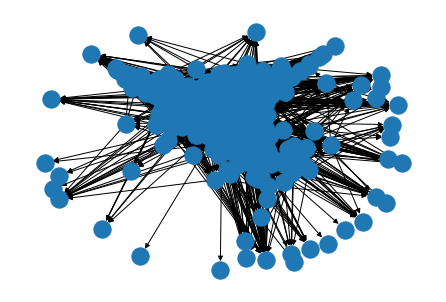

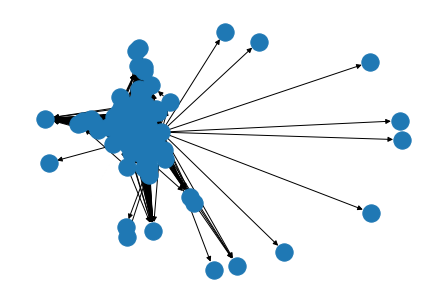

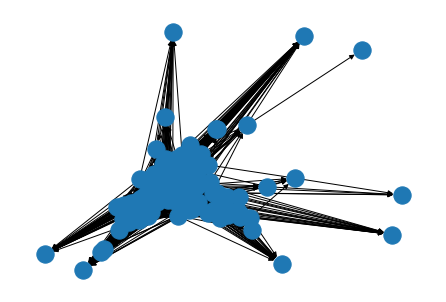

In [135]:
highest_three_community = sorted(c, key = c.get, reverse = True)[:3]
print("The highest 3 communities are", highest_three_community)

for i in highest_three_community:
    selected_data = dict((n,d['community']) for n,d in directed_graph.nodes().items() if d['community'] == i)
    sg=directed_graph.subgraph(list(selected_data.keys()))
    pos = nx.spring_layout(sg, seed=5656)
    nx.draw(sg, pos=pos)
    plt.show()



### After doing so, remove the top 3 nodes with the highest Degree Centrality, Closeness Centrality, Betweenness Centrality, and Eigenvector. Each should be in a separate plot/draw.

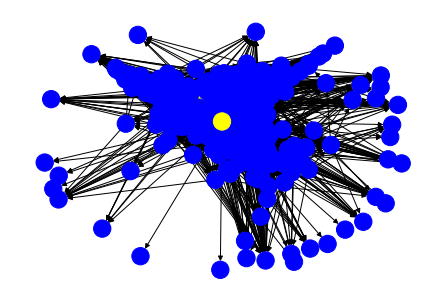

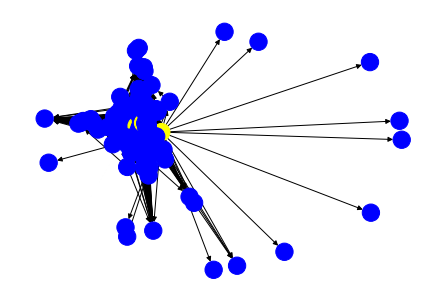

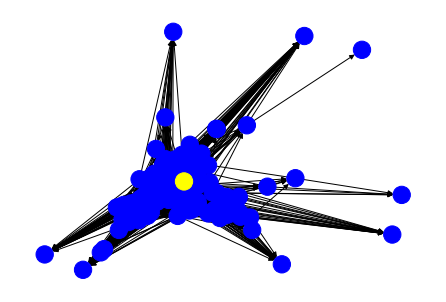

In [162]:
#degree centrality

#create an empty list to collect the nodes to delete
empty_list = []

for i in highest_three_community:

    selected_data = dict((n,d['community']) for n,d in directed_graph.nodes().items() if d['community'] == i)
    sg=directed_graph.subgraph(list(selected_data.keys()))
    degree_centrality = nx.degree_centrality(sg).items()
    nodes_to_delete = sorted(degree_centrality, key=lambda pair: -pair[1])[:3]
    nodes_to_delete = [i[0] for i in nodes_to_delete]
    for i in nodes_to_delete:
        empty_list.append(i)
                        
    color_ = ["yellow" if node in nodes_to_delete else "blue" for node in sg]
    pos = nx.spring_layout(sg, seed = 5656)
    nx.draw(sg, pos=pos, node_color = color_)
    plt.show()



In [167]:
# check if our list contains the above 9 nodes
len(empty_list)

18

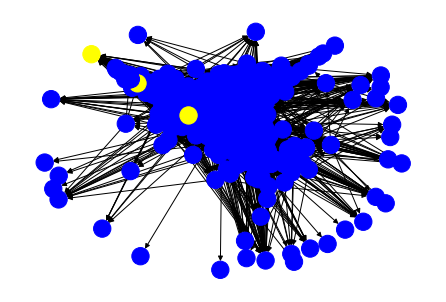

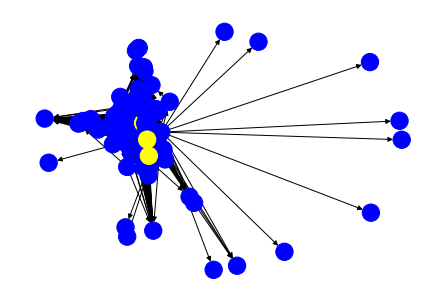

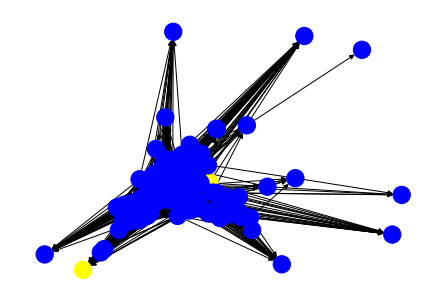

In [165]:
#closeness centrality

for i in highest_three_community:

    selected_data = dict((n,d['community']) for n,d in directed_graph.nodes().items() if d['community'] == i)
    sg=directed_graph.subgraph(list(selected_data.keys()))
    closeness_centrality = nx.closeness_centrality(sg).items()
    nodes_to_delete = sorted(closeness_centrality, key=lambda pair: -pair[1])[:3]
    nodes_to_delete = [i[0] for i in nodes_to_delete]
    for i in nodes_to_delete:
        empty_list.append(i)
                        
    color_ = ["yellow" if node in nodes_to_delete else "blue" for node in sg]
    pos = nx.spring_layout(sg, seed = 5656)
    nx.draw(sg, pos=pos, node_color = color_)
    plt.show()


In [166]:
# +9 to our list, total should be 18 
len(empty_list)

18

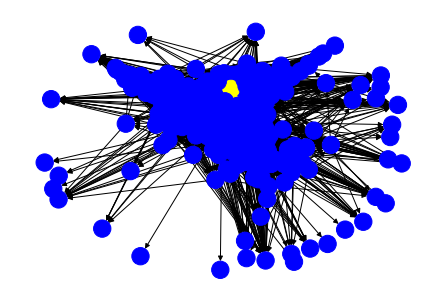

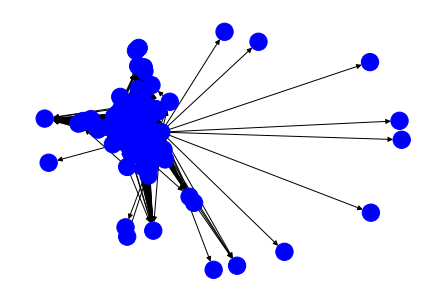

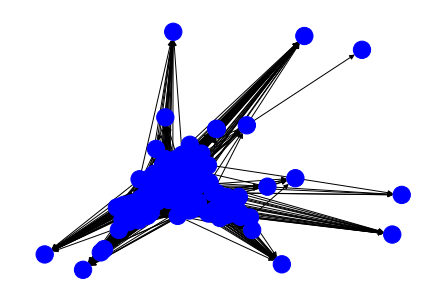

In [168]:
#betweenness centrality

for i in highest_three_community:

    selected_data = dict((n,d['community']) for n,d in directed_graph.nodes().items() if d['community'] == i)
    sg=directed_graph.subgraph(list(selected_data.keys()))
    betweenness_centrality = nx.betweenness_centrality(sg).items()
    nodes_to_delete = sorted(betweenness_centrality, key=lambda pair: -pair[1])[:3]
    nodes_to_delete = [i[0] for i in nodes_to_delete]
    for i in nodes_to_delete:
        empty_list.append(i)
                        
    color_ = ["yellow" if node in nodes_to_delete else "blue" for node in sg]
    pos = nx.spring_layout(sg, seed = 5656)
    nx.draw(sg, pos=pos, node_color = color_)
    plt.show()


In [169]:
# +9, total should be 27
len(empty_list)

27

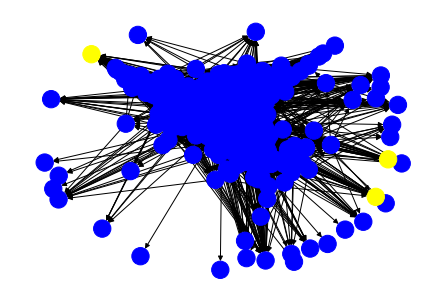

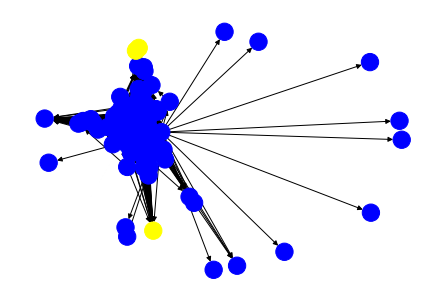

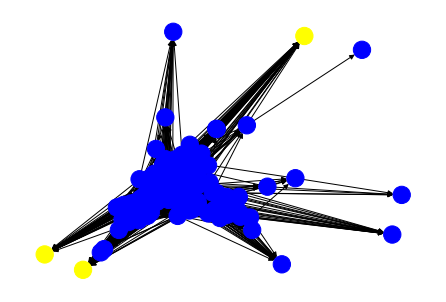

In [170]:
#eigenvector_centrality
for community in highest_three_community:
    selected_data = dict((n,d['community']) for n,d in directed_graph.nodes().items() if d['community'] == community)   
    sg=directed_graph.subgraph(list(selected_data.keys()))
    eigenvectors_centrality = nx.centrality.eigenvector_centrality(sg,max_iter = 1300)
    eigenvectors_ = nx.centrality.eigenvector_centrality(sg.reverse(),max_iter = 1300)
    for node in eigenvectors_centrality.keys():
        eigenvectors_centrality[node] = (eigenvectors_centrality[node]+eigenvectors_[node])/2
    nodes_to_delete = sorted(eigenvectors_centrality, key=lambda pair: -pair)[:3]
    for i in nodes_to_delete:
        empty_list.append(i)
    color_ = ["yellow" if node in nodes_to_delete else "blue" for node in sg]
    pos = nx.spring_layout(sg, seed=5656)
    nx.draw(sg, pos=pos,node_color=color_)

    plt.show()

In [171]:
# +9, total should be 36
len(empty_list)

36

### 10.Draw the influencers of those top 3 communities.

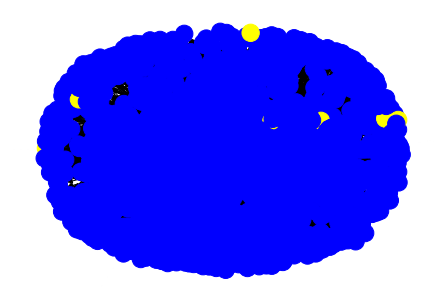

In [172]:
# take the "empty_list" and turn it into a set
influencers_list = set(empty_list)

#draw the directed_graph in blue and plot the nodes in the new set in yellow
pos = nx.spring_layout(directed_graph, seed=5656)
color_= ['yellow' if node in influencers_list else "blue" for node in directed_graph]

nx.draw(directed_graph, pos=pos, node_color=color_)
plt.show()